# MAST30034 Applied Data Science Project 1 Preprocessing

Student Name: Haonan Zhong

Student ID: 867492

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import warnings

warnings.filterwarnings("ignore")

import folium
import seaborn as sns
import matplotlib.pyplot as plt

# Data Importing and Preprocessing

In [2]:
# read datasets
yellow_01 = pd.read_csv('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/raw_data/yellow_2018_01.csv')
yellow_02 = pd.read_csv('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/raw_data/yellow_2018_02.csv')
yellow_07 = pd.read_csv('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/raw_data/yellow_2018_07.csv')
yellow_08 = pd.read_csv('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/raw_data/yellow_2018_08.csv')

# combine the monthly data as a season
yellow_winter = pd.concat([yellow_01, yellow_02]).reset_index(drop=True)
yellow_summer = pd.concat([yellow_07, yellow_08]).reset_index(drop=True)

In [3]:
# remove invalid data

# passenger == 0
yellow_winter = yellow_winter[yellow_winter['passenger_count'] != 0]
yellow_summer = yellow_summer[yellow_summer['passenger_count'] != 0]

# trip_distance == 0
yellow_winter = yellow_winter[yellow_winter['trip_distance'] != 0]
yellow_summer = yellow_summer[yellow_summer['trip_distance'] != 0]

# payment method other than cash and credit card
yellow_winter = yellow_winter[(yellow_winter['payment_type'] != 3) & (yellow_winter['payment_type'] != 4) & (yellow_winter['payment_type'] != 5) & (yellow_winter['payment_type'] != 6)]
yellow_summer = yellow_summer[(yellow_summer['payment_type'] != 3) & (yellow_summer['payment_type'] != 4) & (yellow_summer['payment_type'] != 5) & (yellow_summer['payment_type'] != 6)]

# exclude instances with fare amount less than 2.5
yellow_winter = yellow_winter[(yellow_winter['fare_amount'] >= 2.5)]
yellow_summer = yellow_summer[(yellow_summer['fare_amount'] >= 2.5)]

# total_amount > 0
yellow_winter = yellow_winter[(yellow_winter['total_amount'] >= 2.5)]
yellow_summer = yellow_summer[(yellow_summer['total_amount'] >= 2.5)]

# PU and DO location id not within NYC taxi zone
yellow_winter = yellow_winter[(yellow_winter['PULocationID'] >= 1) & (yellow_winter['PULocationID'] <= 263) & (yellow_winter['DOLocationID'] >= 1) & (yellow_winter['DOLocationID'] <= 263)]
yellow_summer = yellow_summer[(yellow_summer['PULocationID'] >= 1) & (yellow_summer['PULocationID'] <= 263) & (yellow_summer['DOLocationID'] >= 1) & (yellow_summer['DOLocationID'] <= 263)]

# invalid date
yellow_winter = yellow_winter[(yellow_winter['tpep_pickup_datetime'] >= '2018-01-01 00:00:00') & (yellow_winter['tpep_pickup_datetime'] <= '2018-02-28 23:59:59') & (yellow_winter['tpep_dropoff_datetime'] >= '2018-01-01 00:00:00') & (yellow_winter['tpep_dropoff_datetime'] <= '2018-02-28 23:59:59')]
yellow_summer = yellow_summer[(yellow_summer['tpep_pickup_datetime'] >= '2018-07-01 00:00:00') & (yellow_summer['tpep_pickup_datetime'] <= '2018-08-31 23:59:59') & (yellow_summer['tpep_dropoff_datetime'] >= '2018-07-01 00:00:00') & (yellow_summer['tpep_dropoff_datetime'] <= '2018-08-31 23:59:59')]

In [4]:
PUDO_LocationID = ['PULocationID', 'DOLocationID']
amount = ['fare_amount', 'tip_amount', 'total_amount']

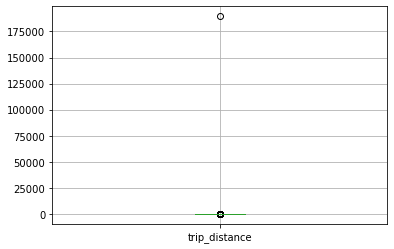

In [5]:
distance_boxplot = yellow_winter.boxplot(column='trip_distance')

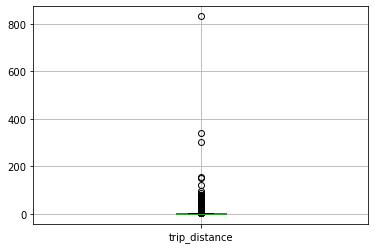

In [6]:
distance_boxplot = yellow_summer.boxplot(column='trip_distance')

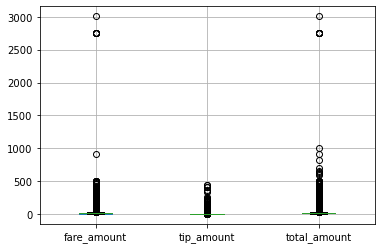

In [7]:
amount_boxplot = yellow_winter.boxplot(column=amount)

In [8]:
Q1_winter = yellow_winter.quantile(0.25)
Q3_winter = yellow_winter.quantile(0.75)
Q1_summer = yellow_summer.quantile(0.25)
Q3_summer = yellow_summer.quantile(0.75)
IQR_winter = Q3_winter - Q1_winter
IQR_summer = Q3_summer - Q1_summer

In [9]:
cleaned_winter = yellow_winter[~((yellow_winter < (Q1_winter - 5 * IQR_winter)).any(axis=1))]
cleaned_winter = yellow_winter[~((yellow_winter > (Q3_winter + 5 * IQR_winter)).any(axis=1))]
cleaned_summer = yellow_summer[~((yellow_summer < (Q1_summer - 5 * IQR_summer)).any(axis=1))]
cleaned_summer = yellow_summer[~((yellow_summer > (Q3_summer + 5 * IQR_summer)).any(axis=1))]

<AxesSubplot:>

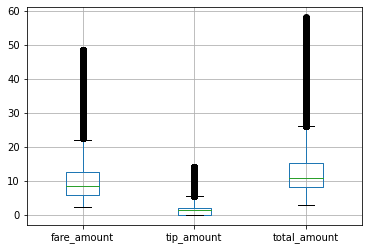

In [10]:
cleaned_winter.boxplot(column=amount)

<AxesSubplot:>

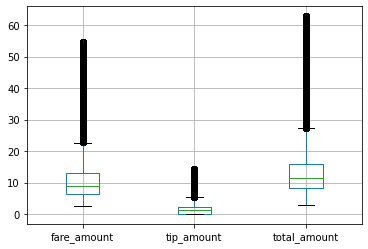

In [11]:
cleaned_summer.boxplot(column=amount)

# Feature Engineering

In [12]:
# Create a new column that contains only pick up date
cleaned_winter['date'] = pd.to_datetime(cleaned_winter['tpep_pickup_datetime'].str[0:10])
cleaned_winter['time'] = cleaned_winter['tpep_pickup_datetime'].str[11:13] + ":00"

cleaned_summer['date'] = pd.to_datetime(cleaned_summer['tpep_pickup_datetime'].str[0:10])
cleaned_summer['time'] = cleaned_summer['tpep_pickup_datetime'].str[11:13] + ":00"

In [13]:
cleaned_winter['weekday'] = cleaned_winter['date'].dt.day_name()
cleaned_summer['weekday'] = cleaned_summer['date'].dt.day_name()

In [14]:
# save to feather
cleaned_winter.reset_index().to_feather('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/preprocessed_data/cleaned_winter.feather')
cleaned_summer.reset_index().to_feather('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/preprocessed_data/cleaned_summer.feather')

In [15]:
weather = pd.read_csv('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/raw_data/weather_2018.csv')
weather = weather.drop(['TAVG', 'STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION'], axis=1)
weather.to_feather('/Users/greysonchung/Documents/mast30034_2021_s2_project_1-greysonchung/preprocessed_data/cleaned_weather.feather')